In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ldlr_metadata = pd.read_csv('../data/ApoE_LdlR/ApoE_LdlR_metadata.txt', 
                            sep='\t', usecols=['sample_name', 'title', 'tube_id', 'timepoint', 'zt', 'collection_date'], index_col=0)
ldlr_metadata.head()

,collection_date,timepoint,title,tube_id,zt
sample_name,,,,,
12473.123La.TP1,8/31/18 22:00,1.0,Apoe_TRF,123L_TP1,16.0
12473.123La.TP2,8/31/18 2:00,2.0,Apoe_TRF,123L_TP2,20.0
12473.123La.TP3,8/31/18 6:00,3.0,Apoe_TRF,123L_TP3,0.0
12473.123La.TP4,8/31/18 10:00,4.0,Apoe_TRF,123L_TP4,4.0
12473.123La.TP5,8/31/18 14:00,5.0,Apoe_TRF,123L_TP5,8.0


In [3]:
ldlr_metadata['stage'] = ldlr_metadata['collection_date'].apply(lambda ele: "Early" if "/18" in ele else "Late" )
ldlr_metadata

,collection_date,timepoint,title,tube_id,zt,stage
sample_name,,,,,,
12473.123La.TP1,8/31/18 22:00,1.0,Apoe_TRF,123L_TP1,16.0,Early
12473.123La.TP2,8/31/18 2:00,2.0,Apoe_TRF,123L_TP2,20.0,Early
12473.123La.TP3,8/31/18 6:00,3.0,Apoe_TRF,123L_TP3,0.0,Early
12473.123La.TP4,8/31/18 10:00,4.0,Apoe_TRF,123L_TP4,4.0,Early
12473.123La.TP5,8/31/18 14:00,5.0,Apoe_TRF,123L_TP5,8.0,Early
...,...,...,...,...,...,...
12473.BLANK3.9D,not applicable,NaN,Ldlr_adlib,not applicable,NaN,Late
12473.BLANK3.9E,not applicable,NaN,Ldlr_adlib,not applicable,NaN,Late
12473.BLANK3.9F,not applicable,NaN,Ldlr_adlib,not applicable,NaN,Late


In [4]:
ldlr_metadata.drop(columns=['collection_date'], inplace=True)

In [5]:
ldlr_wUF_dm = pd.read_csv('../data/ApoE_LdlR/distance_matrix_weighted_unifrac.tsv', sep='\t', index_col=0)
ldlr_wUF_dm.head()

,12473.130Nb.TP6,12473.130Ra.TP2,12473.133Na.TP3,12473.133Na.TP4,12473.130Ra.TP5,12473.130Nb.TP1,12473.131La.TP2,12473.131Nb.TP1,12473.131Nb.TP6,12473.131La.TP5,...,12473.130Ra.TP6,12473.130Nb.TP2,12473.133Lb.TP4,12473.133Rb.TP3,12473.131La.TP1,12473.132Lb.TP4,12473.131Nb.TP2,12473.131Nb.TP5,12473.132Lb.TP3,12473.131La.TP6
12473.130Nb.TP6,0.000000,0.097456,0.178291,0.239012,0.174862,0.056933,0.245705,0.124351,0.093296,0.217713,...,0.162031,0.054753,0.166603,0.102149,0.144712,0.106010,0.132359,0.167528,0.193591,0.132670
12473.130Ra.TP2,0.097456,0.000000,0.137785,0.211790,0.168510,0.120607,0.225200,0.119837,0.104188,0.209656,...,0.119109,0.106095,0.158432,0.087544,0.118845,0.092806,0.117867,0.151992,0.228527,0.116524
12473.133Na.TP3,0.178291,0.137785,0.000000,0.152035,0.142772,0.189405,0.168787,0.154864,0.129699,0.221762,...,0.144320,0.185753,0.169341,0.105454,0.134007,0.136555,0.156923,0.168574,0.221382,0.164041
12473.133Na.TP4,0.239012,0.211790,0.152035,0.000000,0.163518,0.259412,0.131187,0.177619,0.192724,0.146854,...,0.174575,0.242882,0.163598,0.196250,0.172471,0.186487,0.176273,0.158155,0.265997,0.197094
12473.130Ra.TP5,0.174862,0.168510,0.142772,0.163518,0.000000,0.183772,0.174589,0.122060,0.137579,0.177234,...,0.123020,0.173416,0.153680,0.150506,0.180395,0.172611,0.136223,0.143860,0.236531,0.183944


In [6]:
named_wUF_dm = pd.merge(ldlr_metadata, ldlr_wUF_dm, left_index=True, right_index=True)
named_wUF_dm.head()

,timepoint,title,tube_id,zt,stage,12473.130Nb.TP6,12473.130Ra.TP2,12473.133Na.TP3,12473.133Na.TP4,12473.130Ra.TP5,...,12473.130Ra.TP6,12473.130Nb.TP2,12473.133Lb.TP4,12473.133Rb.TP3,12473.131La.TP1,12473.132Lb.TP4,12473.131Nb.TP2,12473.131Nb.TP5,12473.132Lb.TP3,12473.131La.TP6
12473.130Na.TP1,1.0,Ldlr_TRF,130N_TP1,16.0,Early,0.231446,0.211044,0.173860,0.147959,0.111194,...,0.160464,0.223148,0.150439,0.192238,0.184970,0.197920,0.179296,0.142433,0.255341,0.195730
12473.130Na.TP2,2.0,Ldlr_TRF,130N_TP2,20.0,Early,0.099258,0.089837,0.142610,0.230513,0.170345,...,0.143438,0.104109,0.169758,0.076768,0.154416,0.114963,0.151458,0.177548,0.228366,0.146998
12473.130Na.TP3,3.0,Ldlr_TRF,130N_TP3,0.0,Early,0.164214,0.145488,0.139657,0.167017,0.107630,...,0.123531,0.156572,0.135496,0.119429,0.166459,0.143738,0.145106,0.153099,0.243218,0.170721
12473.130Na.TP4,4.0,Ldlr_TRF,130N_TP4,4.0,Early,0.356851,0.346953,0.282264,0.208024,0.217766,...,0.283434,0.345580,0.261325,0.311363,0.304387,0.311441,0.292057,0.257063,0.317698,0.325208
12473.130Na.TP5,5.0,Ldlr_TRF,130N_TP5,8.0,Early,0.175508,0.169301,0.118615,0.146921,0.117157,...,0.140699,0.173233,0.105984,0.131134,0.128904,0.143589,0.147203,0.137877,0.210770,0.157911


In [7]:
named_wUF_dm['group_time'] = named_wUF_dm['title'].str.split('_').str[1].astype(str) + "_" + named_wUF_dm['zt'].astype(str) + '_' + named_wUF_dm['stage'].astype(str)

In [8]:
gt_wUF_dm = named_wUF_dm[['group_time']].copy()
gt_wUF_dm.head()

,group_time
12473.130Na.TP1,TRF_16.0_Early
12473.130Na.TP2,TRF_20.0_Early
12473.130Na.TP3,TRF_0.0_Early
12473.130Na.TP4,TRF_4.0_Early
12473.130Na.TP5,TRF_8.0_Early


In [9]:
named_wUF_dm = named_wUF_dm.set_index('group_time')
named_wUF_dm

,timepoint,title,tube_id,zt,stage,12473.130Nb.TP6,12473.130Ra.TP2,12473.133Na.TP3,12473.133Na.TP4,12473.130Ra.TP5,...,12473.130Ra.TP6,12473.130Nb.TP2,12473.133Lb.TP4,12473.133Rb.TP3,12473.131La.TP1,12473.132Lb.TP4,12473.131Nb.TP2,12473.131Nb.TP5,12473.132Lb.TP3,12473.131La.TP6
group_time,,,,,,,,,,,,,,,,,,,,,
TRF_16.0_Early,1.0,Ldlr_TRF,130N_TP1,16.0,Early,0.231446,0.211044,0.173860,0.147959,0.111194,...,0.160464,0.223148,0.150439,0.192238,0.184970,0.197920,0.179296,0.142433,0.255341,0.195730
TRF_20.0_Early,2.0,Ldlr_TRF,130N_TP2,20.0,Early,0.099258,0.089837,0.142610,0.230513,0.170345,...,0.143438,0.104109,0.169758,0.076768,0.154416,0.114963,0.151458,0.177548,0.228366,0.146998
TRF_0.0_Early,3.0,Ldlr_TRF,130N_TP3,0.0,Early,0.164214,0.145488,0.139657,0.167017,0.107630,...,0.123531,0.156572,0.135496,0.119429,0.166459,0.143738,0.145106,0.153099,0.243218,0.170721
TRF_4.0_Early,4.0,Ldlr_TRF,130N_TP4,4.0,Early,0.356851,0.346953,0.282264,0.208024,0.217766,...,0.283434,0.345580,0.261325,0.311363,0.304387,0.311441,0.292057,0.257063,0.317698,0.325208
TRF_8.0_Early,5.0,Ldlr_TRF,130N_TP5,8.0,Early,0.175508,0.169301,0.118615,0.146921,0.117157,...,0.140699,0.173233,0.105984,0.131134,0.128904,0.143589,0.147203,0.137877,0.210770,0.157911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
adlib_20.0_Late,2.0,Ldlr_adlib,133R_TP2,20.0,Late,0.365823,0.375546,0.384904,0.408862,0.394009,...,0.387382,0.361431,0.395238,0.376360,0.401079,0.369951,0.402246,0.411739,0.363181,0.404360
adlib_0.0_Late,3.0,Ldlr_adlib,133R_TP3,0.0,Late,0.102149,0.087544,0.105454,0.196250,0.150506,...,0.145334,0.111849,0.150436,0.000000,0.138877,0.099994,0.141176,0.160346,0.222596,0.137623
adlib_4.0_Late,4.0,Ldlr_adlib,133R_TP4,4.0,Late,0.155875,0.152891,0.155681,0.185569,0.171459,...,0.164637,0.152930,0.088566,0.159533,0.085175,0.101074,0.099324,0.113473,0.144869,0.118369


In [10]:
named_wUF_dm2 = named_wUF_dm.drop(columns=['title', 'tube_id', 'timepoint', 'zt', 'stage'])
named_wUF_dm2

,12473.130Nb.TP6,12473.130Ra.TP2,12473.133Na.TP3,12473.133Na.TP4,12473.130Ra.TP5,12473.130Nb.TP1,12473.131La.TP2,12473.131Nb.TP1,12473.131Nb.TP6,12473.131La.TP5,...,12473.130Ra.TP6,12473.130Nb.TP2,12473.133Lb.TP4,12473.133Rb.TP3,12473.131La.TP1,12473.132Lb.TP4,12473.131Nb.TP2,12473.131Nb.TP5,12473.132Lb.TP3,12473.131La.TP6
group_time,,,,,,,,,,,,,,,,,,,,,
TRF_16.0_Early,0.231446,0.211044,0.173860,0.147959,0.111194,0.249101,0.119523,0.170033,0.195530,0.131998,...,0.160464,0.223148,0.150439,0.192238,0.184970,0.197920,0.179296,0.142433,0.255341,0.195730
TRF_20.0_Early,0.099258,0.089837,0.142610,0.230513,0.170345,0.103020,0.240749,0.141150,0.131722,0.222251,...,0.143438,0.104109,0.169758,0.076768,0.154416,0.114963,0.151458,0.177548,0.228366,0.146998
TRF_0.0_Early,0.164214,0.145488,0.139657,0.167017,0.107630,0.180995,0.192760,0.141418,0.156450,0.193356,...,0.123531,0.156572,0.135496,0.119429,0.166459,0.143738,0.145106,0.153099,0.243218,0.170721
TRF_4.0_Early,0.356851,0.346953,0.282264,0.208024,0.217766,0.360860,0.216759,0.286623,0.316199,0.232811,...,0.283434,0.345580,0.261325,0.311363,0.304387,0.311441,0.292057,0.257063,0.317698,0.325208
TRF_8.0_Early,0.175508,0.169301,0.118615,0.146921,0.117157,0.192966,0.148904,0.143069,0.147912,0.160289,...,0.140699,0.173233,0.105984,0.131134,0.128904,0.143589,0.147203,0.137877,0.210770,0.157911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
adlib_20.0_Late,0.365823,0.375546,0.384904,0.408862,0.394009,0.356505,0.419641,0.400825,0.383537,0.408323,...,0.387382,0.361431,0.395238,0.376360,0.401079,0.369951,0.402246,0.411739,0.363181,0.404360
adlib_0.0_Late,0.102149,0.087544,0.105454,0.196250,0.150506,0.122770,0.208184,0.131525,0.114009,0.215664,...,0.145334,0.111849,0.150436,0.000000,0.138877,0.099994,0.141176,0.160346,0.222596,0.137623
adlib_4.0_Late,0.155875,0.152891,0.155681,0.185569,0.171459,0.161487,0.166471,0.095492,0.110915,0.116095,...,0.164637,0.152930,0.088566,0.159533,0.085175,0.101074,0.099324,0.113473,0.144869,0.118369


In [11]:
rn_wUF_dm = pd.merge(named_wUF_dm2.T, gt_wUF_dm, left_index=True, right_index=True)
rn_wUF_dm2 = rn_wUF_dm.set_index('group_time')
rn_wUF_dm2

,TRF_16.0_Early,TRF_20.0_Early,TRF_0.0_Early,TRF_4.0_Early,TRF_8.0_Early,TRF_12.0_Early,TRF_16.0_Late,TRF_20.0_Late,TRF_0.0_Late,TRF_4.0_Late,...,adlib_0.0_Early,adlib_4.0_Early,adlib_8.0_Early,adlib_12.0_Early,adlib_16.0_Late,adlib_20.0_Late,adlib_0.0_Late,adlib_4.0_Late,adlib_8.0_Late,adlib_12.0_Late
group_time,,,,,,,,,,,,,,,,,,,,,
TRF_12.0_Late,0.231446,0.099258,0.164214,0.356851,0.175508,0.214363,0.056933,0.054753,0.094771,0.186832,...,0.238859,0.212979,0.138935,0.198613,0.117614,0.365823,0.102149,0.155875,0.211579,0.116438
TRF_20.0_Early,0.211044,0.089837,0.145488,0.346953,0.169301,0.214971,0.120607,0.106095,0.114719,0.193580,...,0.187070,0.199542,0.115319,0.177364,0.100571,0.375546,0.087544,0.152891,0.203747,0.105582
adlib_0.0_Early,0.173860,0.142610,0.139657,0.282264,0.118615,0.164392,0.189405,0.185753,0.151165,0.197672,...,0.121308,0.154789,0.094153,0.121990,0.135171,0.384904,0.105454,0.155681,0.188639,0.123941
adlib_4.0_Early,0.147959,0.230513,0.167017,0.208024,0.146921,0.146623,0.259412,0.242882,0.204785,0.209567,...,0.216414,0.162802,0.170143,0.127993,0.187011,0.408862,0.196250,0.185569,0.149166,0.167658
TRF_8.0_Early,0.111194,0.170345,0.107630,0.217766,0.117157,0.101055,0.183772,0.173416,0.146103,0.140655,...,0.201494,0.150344,0.138053,0.110278,0.196317,0.394009,0.150506,0.171459,0.149594,0.149517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
adlib_4.0_Late,0.197920,0.114963,0.143738,0.311441,0.143589,0.192999,0.118203,0.105034,0.099168,0.188205,...,0.214791,0.189871,0.080745,0.152149,0.065259,0.369951,0.099994,0.101074,0.158710,0.073893
TRF_20.0_Late,0.179296,0.151458,0.145106,0.292057,0.147203,0.186019,0.134779,0.130482,0.120494,0.161000,...,0.228848,0.166966,0.139713,0.147922,0.113422,0.402246,0.141176,0.099324,0.153973,0.088053
TRF_8.0_Late,0.142433,0.177548,0.153099,0.257063,0.137877,0.160486,0.184408,0.169211,0.136808,0.148925,...,0.236645,0.133793,0.149165,0.135872,0.139394,0.411739,0.160346,0.113473,0.125761,0.101595


In [12]:
al_wUF_dm = rn_wUF_dm2.filter(regex='adlib', axis=0)
alt_wUF_dm = al_wUF_dm.filter(regex='TRF', axis=1)
alt_wUF_dm.shape

(48, 47)

In [13]:
alt_wUF_dm.head()

,TRF_16.0_Early,TRF_20.0_Early,TRF_0.0_Early,TRF_4.0_Early,TRF_8.0_Early,TRF_12.0_Early,TRF_16.0_Late,TRF_20.0_Late,TRF_0.0_Late,TRF_4.0_Late,...,TRF_20.0_Early,TRF_0.0_Early,TRF_4.0_Early,TRF_8.0_Early,TRF_12.0_Early,TRF_16.0_Late,TRF_20.0_Late,TRF_4.0_Late,TRF_8.0_Late,TRF_12.0_Late
group_time,,,,,,,,,,,,,,,,,,,,,
adlib_0.0_Early,0.173860,0.142610,0.139657,0.282264,0.118615,0.164392,0.189405,0.185753,0.151165,0.197672,...,0.276226,0.120454,0.227072,0.163423,0.098865,0.154864,0.156923,0.220820,0.168574,0.129699
adlib_4.0_Early,0.147959,0.230513,0.167017,0.208024,0.146921,0.146623,0.259412,0.242882,0.204785,0.209567,...,0.299796,0.207395,0.162735,0.161716,0.177256,0.177619,0.176273,0.125449,0.158155,0.192724
adlib_8.0_Early,0.171910,0.108126,0.115180,0.280468,0.108555,0.146811,0.148393,0.134894,0.092412,0.187389,...,0.326691,0.105587,0.240831,0.156378,0.087647,0.130437,0.139713,0.241061,0.149165,0.120716
adlib_20.0_Early,0.198594,0.166626,0.131094,0.286487,0.142509,0.184401,0.198840,0.204516,0.163185,0.195085,...,0.241018,0.150312,0.208591,0.178095,0.155916,0.163784,0.156947,0.218820,0.165947,0.166776
adlib_16.0_Late,0.197450,0.135249,0.158595,0.310921,0.146072,0.191389,0.146414,0.144734,0.118014,0.201371,...,0.303278,0.113200,0.247159,0.191894,0.123983,0.108118,0.112669,0.235332,0.122971,0.095699


### Early

In [14]:
alt_wUF_dm2 = alt_wUF_dm.filter(regex='Early')
early_wUF_dm = alt_wUF_dm2.T.filter(regex='Early')
early_wUF_dm

group_time,adlib_0.0_Early,adlib_4.0_Early,adlib_8.0_Early,adlib_20.0_Early,adlib_8.0_Early,adlib_20.0_Early,adlib_8.0_Early,adlib_20.0_Early,adlib_8.0_Early,adlib_20.0_Early,...,adlib_4.0_Early,adlib_0.0_Early,adlib_12.0_Early,adlib_16.0_Early,adlib_12.0_Early,adlib_16.0_Early,adlib_12.0_Early,adlib_16.0_Early,adlib_12.0_Early,adlib_16.0_Early
TRF_16.0_Early,0.173860,0.147959,0.171910,0.198594,0.135794,0.397962,0.179596,0.177906,0.109473,0.186085,...,0.104511,0.212712,0.156994,0.171529,0.103590,0.180684,0.166820,0.164918,0.156296,0.340605
TRF_20.0_Early,0.142610,0.230513,0.108126,0.166626,0.197412,0.405170,0.136655,0.119127,0.208593,0.121382,...,0.196977,0.155415,0.125752,0.109460,0.181777,0.119276,0.121727,0.096350,0.145240,0.349152
TRF_0.0_Early,0.139657,0.167017,0.115180,0.131094,0.126371,0.401426,0.124672,0.121248,0.139346,0.136227,...,0.159032,0.146213,0.107932,0.126852,0.098585,0.133688,0.115337,0.112285,0.113722,0.347594
TRF_4.0_Early,0.282264,0.208024,0.280468,0.286487,0.224352,0.387942,0.275891,0.292227,0.213367,0.308183,...,0.228873,0.314397,0.289168,0.300232,0.211833,0.296519,0.281633,0.291766,0.263081,0.378055
TRF_8.0_Early,0.118615,0.146921,0.108555,0.142509,0.080662,0.392805,0.117722,0.111426,0.125024,0.132286,...,0.101602,0.142785,0.103662,0.119063,0.073608,0.116654,0.109342,0.105773,0.098413,0.336003
TRF_12.0_Early,0.164392,0.146623,0.146811,0.184401,0.108823,0.395011,0.157417,0.161576,0.085656,0.178894,...,0.103477,0.192447,0.152197,0.172352,0.079956,0.165344,0.147804,0.156686,0.139061,0.334053
TRF_16.0_Early,0.100207,0.189768,0.097530,0.147323,0.136798,0.334788,0.108502,0.097095,0.162895,0.097788,...,0.165837,0.149067,0.112002,0.104155,0.130200,0.092020,0.084567,0.111833,0.085975,0.280039
TRF_20.0_Early,0.137785,0.211790,0.115319,0.168531,0.196548,0.399178,0.141856,0.123204,0.190712,0.111780,...,0.199542,0.136646,0.105554,0.106183,0.177364,0.103649,0.112359,0.099988,0.145423,0.333350
TRF_0.0_Early,0.127066,0.201348,0.111634,0.153123,0.180563,0.396204,0.125310,0.108689,0.179912,0.117482,...,0.187047,0.121974,0.100367,0.095914,0.168697,0.093389,0.093141,0.090320,0.130251,0.337104
TRF_4.0_Early,0.200111,0.166238,0.186029,0.176521,0.186531,0.381708,0.197032,0.197137,0.180351,0.215582,...,0.168283,0.169082,0.164630,0.186132,0.190071,0.187155,0.182716,0.180183,0.208828,0.330663


In [15]:
mean_early_wUF_dm = early_wUF_dm.groupby(level=0).mean()
mean_early_wUF_dm2 = mean_early_wUF_dm.reindex(index = ['TRF_4.0_Early', 'TRF_8.0_Early', 'TRF_12.0_Early', 'TRF_16.0_Early', 'TRF_20.0_Early', 'TRF_0.0_Early'])
mean_early_wUF_dm3 = mean_early_wUF_dm2.T.groupby(level=0).mean().sort_index(axis=0)
mean_early_wUF_dm4 = mean_early_wUF_dm3.reindex(index = ['adlib_4.0_Early', 'adlib_8.0_Early', 'adlib_12.0_Early', 'adlib_16.0_Early', 'adlib_20.0_Early', 'adlib_0.0_Early'])
mean_early_wUF_dm4

,TRF_4.0_Early,TRF_8.0_Early,TRF_12.0_Early,TRF_16.0_Early,TRF_20.0_Early,TRF_0.0_Early
group_time,,,,,,
adlib_4.0_Early,0.200056,0.156352,0.167052,0.155145,0.213427,0.177165
adlib_8.0_Early,0.197025,0.140300,0.139811,0.138000,0.195605,0.143505
adlib_12.0_Early,0.201330,0.136267,0.124291,0.123314,0.189214,0.124196
adlib_16.0_Early,0.247343,0.201438,0.181468,0.179775,0.208949,0.164089
adlib_20.0_Early,0.263118,0.228063,0.215250,0.206113,0.222098,0.196030
adlib_0.0_Early,0.263459,0.231901,0.221104,0.213145,0.225565,0.210142


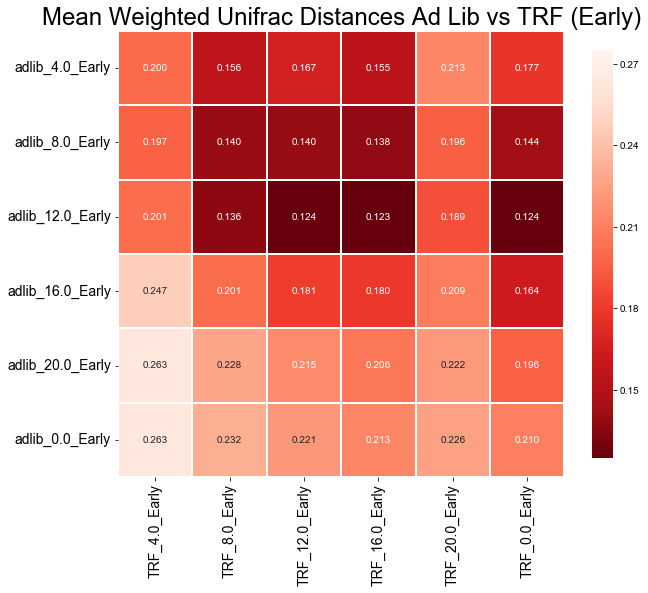

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(mean_early_wUF_dm4, cmap='Reds_r', linewidths=1, cbar_kws={"shrink": 0.75},
            annot=True, fmt = '.3f', vmin=0.125, vmax=0.275, square=True)
sns.set(font_scale=1.5)
plt.xlabel("")
plt.xticks(ha="center")
plt.ylabel("")
plt.yticks(va="center")
ax.set_title("Mean Weighted Unifrac Distances Ad Lib vs TRF (Early)", size=24)
ax.tick_params(labelsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/Ldlr_wUF_early_mean_heatmap.svg', dpi=300, bbox_inches="tight")

### Late

In [17]:
alt_wUF_dm3 = alt_wUF_dm.filter(regex='Late')
late_wUF_dm = alt_wUF_dm3.T.filter(regex='Late')
late_wUF_dm

group_time,adlib_16.0_Late,adlib_12.0_Late,adlib_16.0_Late,adlib_12.0_Late,adlib_12.0_Late,adlib_16.0_Late,adlib_12.0_Late,adlib_16.0_Late,adlib_4.0_Late,adlib_0.0_Late,...,adlib_8.0_Late,adlib_20.0_Late,adlib_20.0_Late,adlib_8.0_Late,adlib_4.0_Late,adlib_0.0_Late,adlib_4.0_Late,adlib_0.0_Late,adlib_4.0_Late,adlib_0.0_Late
TRF_16.0_Late,0.146414,0.166906,0.180375,0.264205,0.103020,0.136069,0.136828,0.107741,0.239256,0.141725,...,0.229070,0.122310,0.176656,0.182667,0.161487,0.198085,0.178247,0.122770,0.118203,0.178261
TRF_20.0_Late,0.144734,0.168903,0.182041,0.257013,0.097983,0.130096,0.121770,0.100736,0.230245,0.129211,...,0.207567,0.107472,0.179456,0.183689,0.152930,0.193046,0.170518,0.111849,0.105034,0.191960
TRF_0.0_Late,0.118014,0.131346,0.147814,0.208797,0.103448,0.118359,0.096049,0.096614,0.185693,0.118905,...,0.171083,0.150290,0.170353,0.141164,0.140475,0.165160,0.134420,0.101334,0.099168,0.181189
TRF_4.0_Late,0.201371,0.168164,0.196313,0.178916,0.190730,0.213408,0.176196,0.198328,0.207187,0.196963,...,0.181194,0.237918,0.233059,0.171472,0.186565,0.260235,0.141413,0.170813,0.188205,0.217316
TRF_8.0_Late,0.149099,0.122843,0.165238,0.185635,0.139292,0.166587,0.139740,0.156660,0.192039,0.153080,...,0.179802,0.190697,0.212936,0.131516,0.138020,0.230778,0.127877,0.128660,0.152122,0.193041
TRF_12.0_Late,0.132957,0.155716,0.178020,0.254726,0.092626,0.117614,0.116438,0.090969,0.222729,0.125650,...,0.211579,0.108727,0.181625,0.170470,0.155875,0.193411,0.166603,0.102149,0.106010,0.193591
TRF_16.0_Late,0.175573,0.198207,0.215397,0.300567,0.130889,0.150646,0.158483,0.127783,0.264674,0.156607,...,0.259478,0.118448,0.183040,0.215613,0.187324,0.232480,0.214558,0.145265,0.139552,0.211854
TRF_20.0_Late,0.266912,0.289479,0.261724,0.279967,0.310209,0.279504,0.258377,0.290976,0.293248,0.295344,...,0.292573,0.325512,0.286094,0.281136,0.302664,0.237759,0.279205,0.290773,0.282613,0.295740
TRF_0.0_Late,0.189003,0.203865,0.218436,0.274952,0.128777,0.195820,0.178319,0.161626,0.282126,0.179997,...,0.255437,0.179181,0.230229,0.225145,0.201062,0.225579,0.221684,0.133486,0.167063,0.229275
TRF_4.0_Late,0.166956,0.144722,0.154398,0.176619,0.153719,0.179390,0.132813,0.161217,0.177519,0.177618,...,0.141181,0.206604,0.207490,0.140038,0.139979,0.199678,0.123292,0.162820,0.155994,0.172778


In [18]:
mean_late_wUF_dm = late_wUF_dm.groupby(level=0).mean()
mean_late_wUF_dm2 = mean_late_wUF_dm.reindex(['TRF_4.0_Late', 'TRF_8.0_Late', 'TRF_12.0_Late', 'TRF_16.0_Late', 'TRF_20.0_Late', 'TRF_0.0_Late'])
mean_late_wUF_dm3 = mean_late_wUF_dm2.T.groupby(level=0).mean().sort_index(axis=0)
mean_late_wUF_dm4 = mean_late_wUF_dm3.reindex(index = ['adlib_4.0_Late', 'adlib_8.0_Late', 'adlib_12.0_Late', 'adlib_16.0_Late', 'adlib_20.0_Late', 'adlib_0.0_Late'])
mean_late_wUF_dm4

,TRF_4.0_Late,TRF_8.0_Late,TRF_12.0_Late,TRF_16.0_Late,TRF_20.0_Late,TRF_0.0_Late
group_time,,,,,,
adlib_4.0_Late,0.171678,0.140494,0.154169,0.154110,0.173447,0.223566
adlib_8.0_Late,0.175419,0.163003,0.197920,0.196534,0.202123,0.251710
adlib_12.0_Late,0.170945,0.143976,0.148017,0.151459,0.176150,0.215594
adlib_16.0_Late,0.192993,0.144905,0.122919,0.132854,0.161491,0.206470
adlib_20.0_Late,0.260369,0.231797,0.223534,0.228200,0.240148,0.274907
adlib_0.0_Late,0.212093,0.173234,0.155484,0.162093,0.185854,0.211156


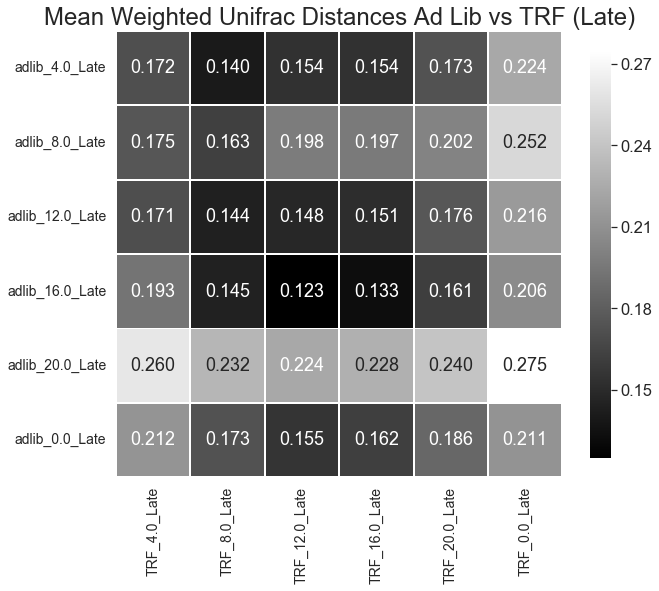

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(mean_late_wUF_dm4, cmap='binary_r', linewidths=1, cbar_kws={"shrink": 0.75},
            annot=True, fmt = '.3f', vmin=0.125, vmax=0.275, square=True)
sns.set(font_scale=1.5)
plt.xlabel("")
plt.xticks(ha="center")
plt.ylabel("")
plt.yticks(va="center")
ax.set_title("Mean Weighted Unifrac Distances Ad Lib vs TRF (Late)", size=24)
ax.tick_params(labelsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/Ldlr_wUF_late_mean_heatmap.svg', dpi=300, bbox_inches="tight")